Logistic_Regression Project

In [59]:
# import necessary libraries
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("placement.csv")

In [61]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [63]:
df = df.iloc[:,1:]

In [64]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [65]:
import matplotlib.pyplot as plt

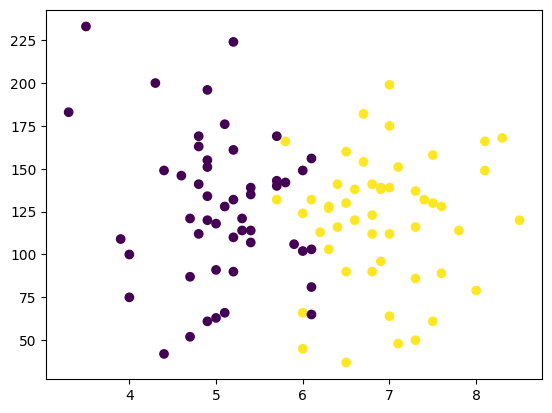

In [66]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [67]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [68]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [69]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [70]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [71]:
X_train

,cgpa,iq
53,8.3,168.0
11,6.9,138.0
63,6.3,128.0
83,7.5,130.0
34,4.8,163.0
...,...,...
3,7.4,132.0
98,6.3,103.0
96,4.4,42.0
93,6.8,112.0


In [72]:
X_test

,cgpa,iq
68,4.0,75.0
71,6.1,132.0
90,7.3,86.0
1,5.9,106.0
57,6.5,130.0
91,7.5,158.0
89,4.9,151.0
62,6.0,102.0
66,6.9,96.0
39,4.6,146.0


In [73]:
y_train

53    1
11    1
63    1
83    1
34    0
     ..
3     1
98    1
96    0
93    1
74    1
Name: placement, Length: 90, dtype: int64

In [74]:
y_test

68    0
71    1
90    1
1     0
57    1
91    1
89    0
62    0
66    1
39    0
Name: placement, dtype: int64

In [75]:
# scale your data
from sklearn.preprocessing import StandardScaler

In [76]:
scalar = StandardScaler()

In [78]:
X_train = scalar.fit_transform(X_train)

In [79]:
X_train

array([[ 2.02052623,  1.07318063],
       [ 0.79419528,  0.33849815],
       [ 0.26862487,  0.09360399],
       [ 1.31976569,  0.14258282],
       [-1.04530114,  0.95073355],
       [ 0.09343474, -0.51863141],
       [ 0.00583967, -1.93901754],
       [-0.16935046,  1.0242018 ],
       [ 0.26862487,  0.06911457],
       [ 0.53141008,  0.33849815],
       [-0.51973074,  0.2650299 ],
       [ 1.31976569, -1.54718688],
       [-0.16935046,  0.43645581],
       [-1.39568142,  0.60788173],
       [ 0.61900515,  1.41603246],
       [-0.78251594,  0.09360399],
       [ 0.09343474,  0.77930764],
       [-0.6073258 , -0.07782192],
       [-0.78251594, -1.4247398 ],
       [ 1.14457555,  0.31400873],
       [-0.95770608,  0.24054049],
       [ 0.00583967, -1.4247398 ],
       [ 1.14457555, -0.200269  ],
       [-0.69492087, -0.83699382],
       [-0.87011101, -0.8125044 ],
       [ 0.18102981, -0.27373725],
       [-0.87011101, -0.15129017],
       [ 1.8453361 ,  1.0242018 ],
       [-2.35922716,

In [80]:
X_test = scalar.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [93]:
X_test

array([[  4. ,  75. ],
       [  6.1, 132. ],
       [  7.3,  86. ],
       [  5.9, 106. ],
       [  6.5, 130. ],
       [  7.5, 158. ],
       [  4.9, 151. ],
       [  6. , 102. ],
       [  6.9,  96. ],
       [  4.6, 146. ]])

In [94]:
# Performing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [95]:
clf = LogisticRegression()

In [103]:
clf.fit(X_train,y_train)

LogisticRegression()

In [102]:
y_pred = clf.predict(X_test)

In [98]:
y_test

68    0
71    1
90    1
1     0
57    1
91    1
89    0
62    0
66    1
39    0
Name: placement, dtype: int64

In [99]:
# Find accuracy score of the model
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred)

0.7

In [104]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

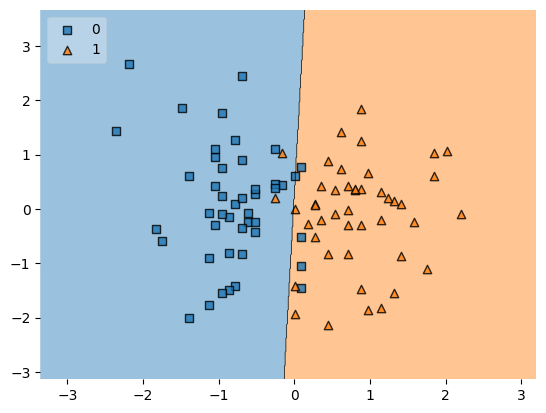

In [105]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend = 2)